<a href="https://colab.research.google.com/github/jnielsonresearch/Machine-Learning-Templates/blob/master/Regression_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression ML Models

## Importing the libraries

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

In [ ]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

In [2]:
import os
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas.util.testing as tm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# Plotting configuration for Jupyter notebook
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## Importing the dataset

In [4]:
# Download the data

import os
datapath = os.path.join("Data", "")

files = ['50_Startups.csv']
  
# Download the data
import urllib.request
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/jnielsonresearch/machine-learning-templates/master/"
os.makedirs(datapath, exist_ok=True)
for filename in files:
    print("Downloading", filename)
    url = DOWNLOAD_ROOT + "Data/" + filename
    urllib.request.urlretrieve(url, datapath + filename)

dataset = pd.read_csv(datapath + files[0])
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [5]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [6]:
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


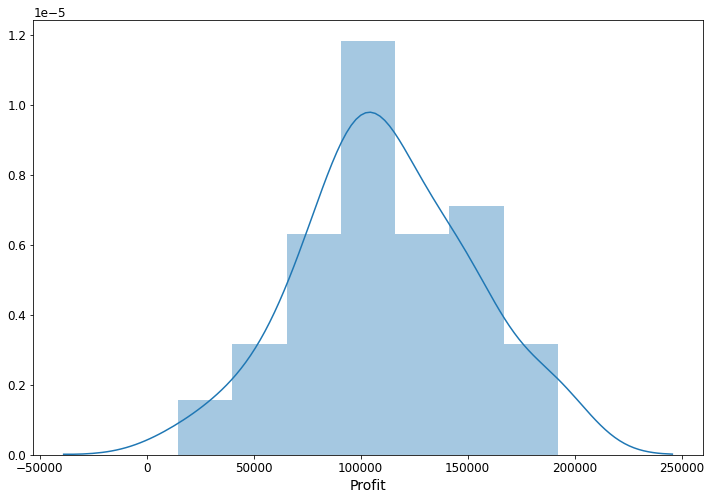

In [7]:
# Distribution plot of dependent variable y 
plt.figure(figsize=(12,8))
sns.distplot(dataset['Profit'])

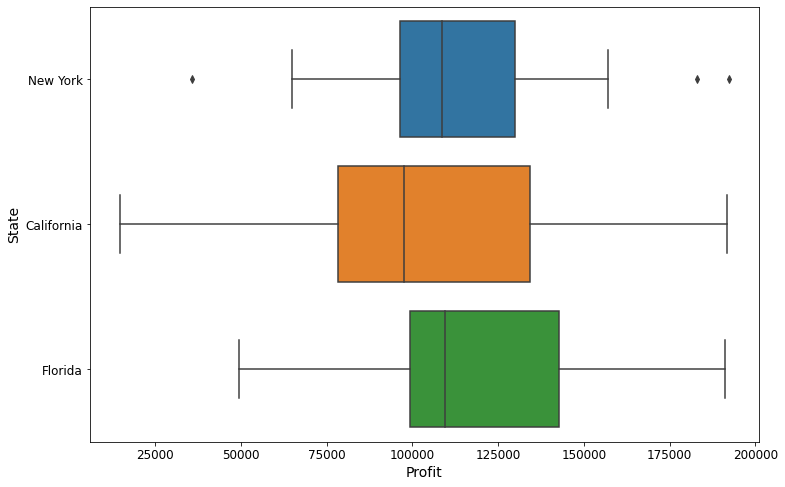

In [8]:
# Profit by State
plt.figure(figsize=(12,8))
sns.boxplot(data=dataset, x='Profit',y='State')

## Pairplot and Covariance Matrix of Numerical Variables

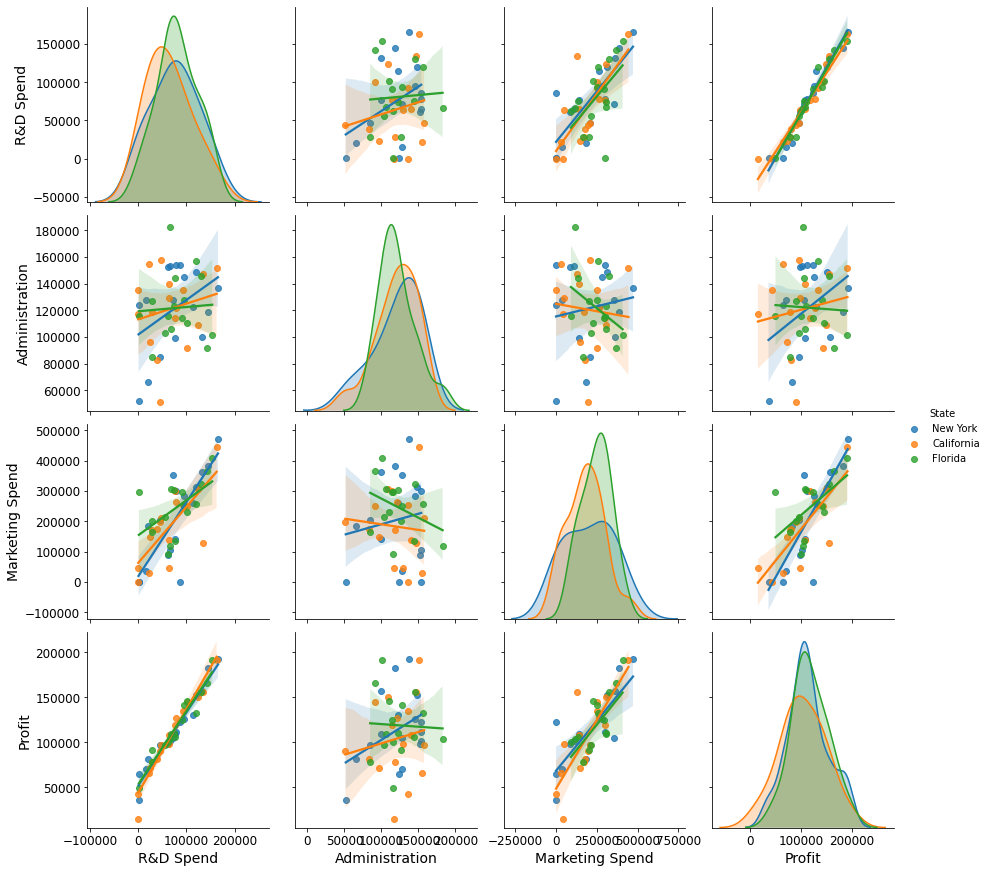

In [9]:
sns.pairplot(dataset, height=3.0, kind='reg', hue='State')

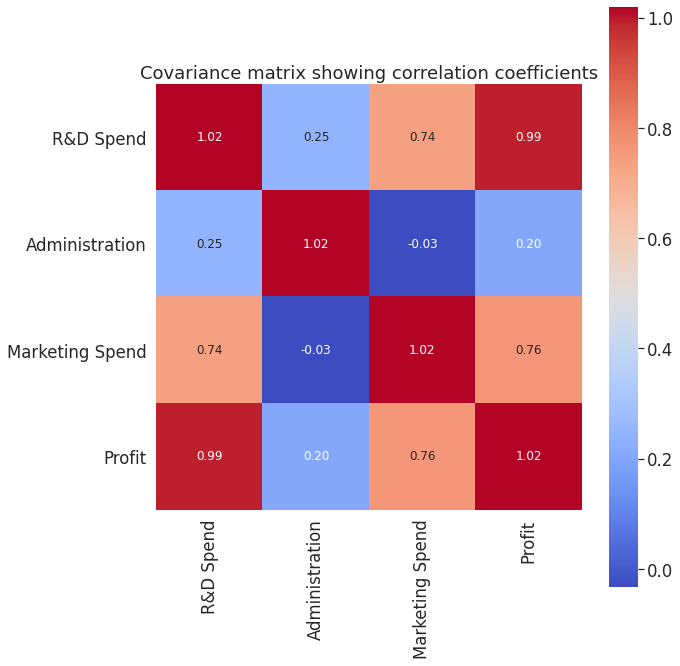

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_cols = dataset.select_dtypes('number').columns
X_std = scaler.fit_transform(dataset[num_cols])
cov_mat =np.cov(X_std.T)
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
hm = sns.heatmap(cov_mat,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 12},
                 cmap='coolwarm',                 
                 yticklabels=num_cols,
                 xticklabels=num_cols)
plt.title('Covariance matrix showing correlation coefficients', size = 18)
plt.tight_layout()
plt.show()

<Figure size 1440x720 with 0 Axes>

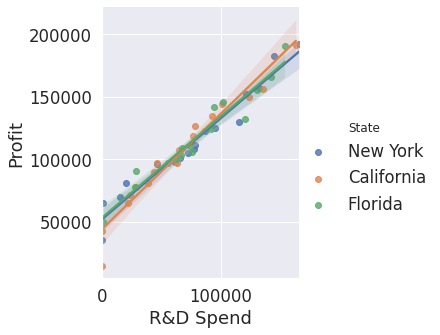

In [11]:
# Visualizing R&D Spend vs. Profit by State
plt.figure(figsize=(20,10))
sns.lmplot(x='R&D Spend',y='Profit', hue="State", data=dataset,)

<Figure size 1440x720 with 0 Axes>

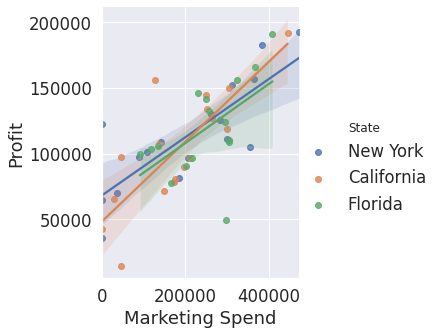

In [12]:
# Visualizing Marketing Spend vs. Profit by State
plt.figure(figsize=(20,10))
sns.lmplot(x='Marketing Spend',y='Profit', hue="State", data=dataset,)

<Figure size 1440x720 with 0 Axes>

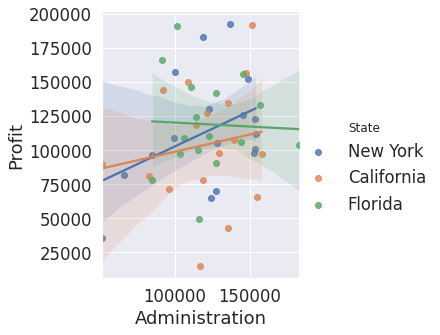

In [13]:
# Visualizing Administration vs. Profit by State
plt.figure(figsize=(20,10))
sns.lmplot(x='Administration',y='Profit', hue="State", data=dataset,)

## Encoding categorical data

In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [15]:
X[0:5,:]

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42]], dtype=object)

## Scaling and Train Test Split of Dataset

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [52]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Evaluation of Linear Regression Model on Training and Test sets

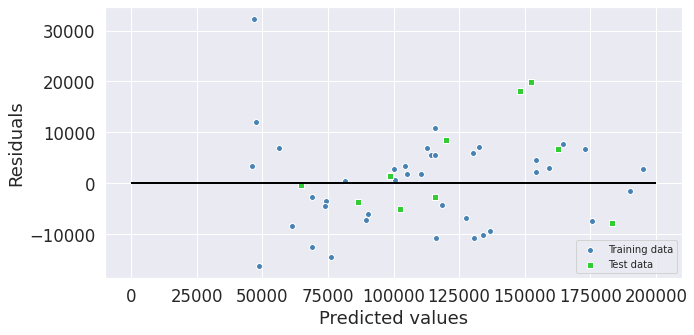

In [125]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

# Plot of Residuals and Predicted Values on Training and Test sets
plt.figure(figsize=(10,5))
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=0, xmax=200000, color='black', lw=2)
plt.tight_layout()
plt.legend(loc='lower right',prop={'size': 10})
plt.show()

In [126]:
# Regression Intercept and Coefficients

print('Regression Intercept: {}'.format(round(lr.fit(X_train, y_train).intercept_,2)))
print('Regression Coefficients: {}'.format(np.round(lr.fit(X_train, y_train).coef_,2)))

Regression Intercept: 46178.34
Regression Coefficients: [-1.29528e+03  5.67810e+02  7.27470e+02  8.20000e-01  1.00000e-02
  3.00000e-02]


In [128]:
# RMSE and R2 Score on Regression Model
from sklearn.metrics import mean_squared_error
print("RMSE on training data : %.2f" % mean_squared_error(y_train, y_train_pred)**0.5)
print("RMSE on test data : %.2f" % mean_squared_error(y_test, y_test_pred)**0.5)

from sklearn.metrics import r2_score
print('\nTraining set R^2 score : %.3f' % r2_score(y_train, y_train_pred))
print('Test set R^2 score : %.3f' % r2_score(y_test, y_test_pred))

RMSE on training data : 8807.74
RMSE on test data : 9750.21

Training set R^2 score : 0.954
Test set R^2 score : 0.915


## K-Fold Cross Validation Evaluation of Linear Regression Model

In [129]:
# K-Fold Cross Validation, RMSE and R2 Score ranges on Training and Test sets
train_errors = []
test_errors = []

train_score = []
test_score = []

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split( X, y, 
                                  test_size=0.2, random_state=i)
    regressor.fit(X_train, y_train)
    y_train_pred = regressor.predict(X_train)
    y_test_pred = regressor.predict(X_test)
    train_errors = np.append(train_errors, mean_squared_error(y_train, 
                            y_train_pred)**0.5)
    test_errors = np.append(test_errors, mean_squared_error(y_test, 
                            y_test_pred)**0.5)
    train_score = np.append(train_score, r2_score(y_train, 
                            y_train_pred))
    test_score = np.append(test_score, r2_score(y_test, 
                            y_test_pred))
    

print('Training set RMSE range: %.3f +/- %.3f' % (np.mean(train_errors), np.std(train_errors)))
print('Training set R^2 score range: %.3f +/- %.3f' % (np.mean(train_score), np.std(train_score)))

print('\nTest set RMSE range: %.3f +/- %.3f' % (np.mean(test_errors), np.std(test_errors)))
print('Test set R^2 score range: %.3f +/- %.3f' % (np.mean(test_score), np.std(test_score)))

Training set RMSE range: 8626.019 +/- 815.737
Training set R^2 score range: 0.951 +/- 0.008

Test set RMSE range: 9906.464 +/- 2616.003
Test set R^2 score range: 0.937 +/- 0.028


## Lasso, Ridge, and ElasticNet regularization methods 

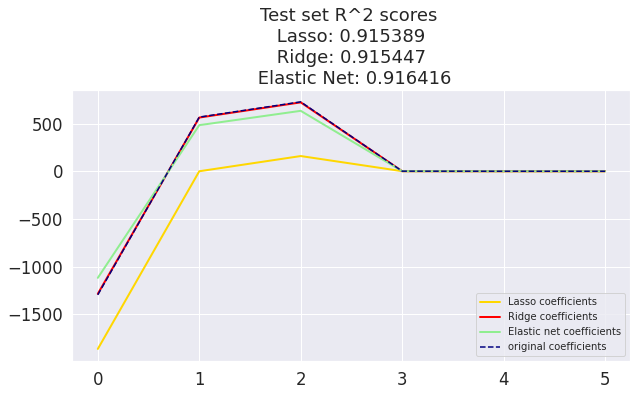

In [130]:
# Lasso - L1 regularization
from sklearn.linear_model import Lasso

alpha = 0.1
lasso = Lasso(alpha=alpha)

y_pred_lasso = lasso.fit(X_train, y_train).predict(X_test)
r2_score_lasso = r2_score(y_test, y_pred_lasso)

# Ridge - L2 regularization
from sklearn.linear_model import Ridge

alpha = 0.1
ridge = Ridge(alpha=alpha)

y_pred_ridge = ridge.fit(X_train, y_train).predict(X_test)
r2_score_ridge = r2_score(y_test, y_pred_ridge)

# ElasticNet - L1 & L2 combined regularization 
from sklearn.linear_model import ElasticNet

enet = ElasticNet(alpha=alpha, l1_ratio=0.5)

y_pred_enet = enet.fit(X_train, y_train).predict(X_test)
r2_score_enet = r2_score(y_test, y_pred_enet)

# Evaluation of Test data for linear regularization methods
plt.figure(figsize=(10,5))
plt.plot(lasso.coef_, color='gold', linewidth=2,
         label='Lasso coefficients')
plt.plot(ridge.coef_, color='red', linewidth=2,
         label='Ridge coefficients')
plt.plot(enet.coef_, color='lightgreen', linewidth=2,
         label='Elastic net coefficients')
plt.plot(lr.coef_, '--', color='navy', label='original coefficients')

plt.title("Test set R^2 scores \n Lasso: %f \n Ridge: %f \n Elastic Net: %f"
          % (r2_score_lasso, r2_score_ridge, r2_score_enet))
plt.legend(loc='lower right',prop={'size': 10})
plt.show()

## Polynomial Regression Model 

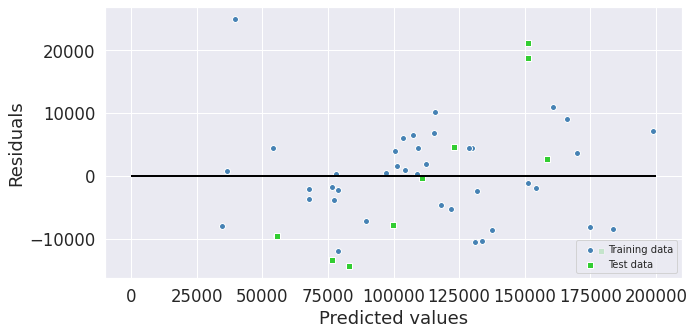

Training set RMSE range: 7052.435 +/- 561.749
Training set R^2 score range: 0.967 +/- 0.005

Test set RMSE range: 12413.262 +/- 1706.110
Test set R^2 score range: 0.900 +/- 0.042


In [131]:
from sklearn import preprocessing
from sklearn import pipeline

poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)

regressor = pipeline.Pipeline([('poly', poly), ('lr', lr)])
regressor.fit(X_train, y_train)

y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

# Plot of Residuals and Predicted Values on Training and Test sets
plt.figure(figsize=(10,5))
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=0, xmax=200000, color='black', lw=2)
plt.tight_layout()
plt.legend(loc='lower right',prop={'size': 10})
plt.show()

# K-Fold Cross Validation, RMSE and R2 Score ranges on Training and Test sets
train_errors = []
test_errors = []

train_score = []
test_score = []

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split( X, y, 
                                  test_size=0.2, random_state=i)
    regressor.fit(X_train, y_train)
    y_train_pred = regressor.predict(X_train)
    y_test_pred = regressor.predict(X_test)
    train_errors = np.append(train_errors, mean_squared_error(y_train, 
                            y_train_pred)**0.5)
    test_errors = np.append(test_errors, mean_squared_error(y_test, 
                            y_test_pred)**0.5)
    train_score = np.append(train_score, r2_score(y_train, 
                            y_train_pred))
    test_score = np.append(test_score, r2_score(y_test, 
                            y_test_pred))
    

print('Training set RMSE range: %.3f +/- %.3f' % (np.mean(train_errors), np.std(train_errors)))
print('Training set R^2 score range: %.3f +/- %.3f' % (np.mean(train_score), np.std(train_score)))

print('\nTest set RMSE range: %.3f +/- %.3f' % (np.mean(test_errors), np.std(test_errors)))
print('Test set R^2 score range: %.3f +/- %.3f' % (np.mean(test_score), np.std(test_score)))

##  Principal Component Analysis for Dimensionality Reduction of Features

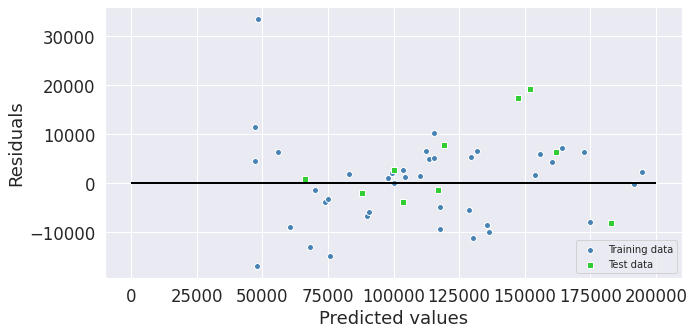

Training set RMSE range: 8676.273 +/- 783.781
Training set R^2 score range: 0.950 +/- 0.007

Test set RMSE range: 9511.671 +/- 2528.316
Test set R^2 score range: 0.943 +/- 0.024


In [132]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
regressor = Pipeline([('pca', PCA(n_components=3)),('lr', LinearRegression())])

regressor.fit(X_train, y_train)

y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

# Plot of Residuals and Predicted Values on Training and Test sets
plt.figure(figsize=(10,5))
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=0, xmax=200000, color='black', lw=2)
plt.tight_layout()
plt.legend(loc='lower right',prop={'size': 10})
plt.show()

# K-Fold Cross Validation, RMSE and R2 Score ranges on Training and Test sets
train_errors = []
test_errors = []

train_score = []
test_score = []

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split( X, y, 
                                  test_size=0.2, random_state=i)
    regressor.fit(X_train, y_train)
    y_train_pred = regressor.predict(X_train)
    y_test_pred = regressor.predict(X_test)
    train_errors = np.append(train_errors, mean_squared_error(y_train, 
                            y_train_pred)**0.5)
    test_errors = np.append(test_errors, mean_squared_error(y_test, 
                            y_test_pred)**0.5)
    train_score = np.append(train_score, r2_score(y_train, 
                            y_train_pred))
    test_score = np.append(test_score, r2_score(y_test, 
                            y_test_pred))
    

print('Training set RMSE range: %.3f +/- %.3f' % (np.mean(train_errors), np.std(train_errors)))
print('Training set R^2 score range: %.3f +/- %.3f' % (np.mean(train_score), np.std(train_score)))

print('\nTest set RMSE range: %.3f +/- %.3f' % (np.mean(test_errors), np.std(test_errors)))
print('Test set R^2 score range: %.3f +/- %.3f' % (np.mean(test_score), np.std(test_score)))

## Support Vector Machine Regression Model using GridSearchCV for best parameters

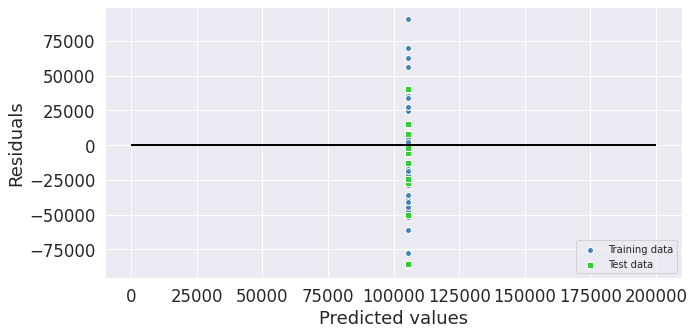

Training set RMSE range: 39300.839 +/- 1564.821
Training set R^2 score range: -0.015 +/- 0.012

Test set RMSE range: 42990.341 +/- 5109.563
Test set R^2 score range: -0.113 +/- 0.072


In [133]:
# SVR with GridSearchCV for best parameters

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

gsc = GridSearchCV(
        estimator=SVR(kernel='rbf'),
        param_grid={
            'C': [0.1, 1, 100, 1000],
            'epsilon': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],
            'gamma': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5]
        },
        cv=10, scoring='r2', verbose=0, n_jobs=-1)

grid_result = gsc.fit(X_train, y_train)
best_params = grid_result.best_params_
regressor = SVR(kernel='rbf', C=best_params["C"], epsilon=best_params["epsilon"], gamma=best_params["gamma"],
                   coef0=0.1, shrinking=True,
                   tol=0.001, cache_size=200, verbose=False, max_iter=-1)

regressor.fit(X_train, y_train)

y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

# Plot of Residuals and Predicted Values on Training and Test sets
plt.figure(figsize=(10,5))
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=0, xmax=200000, color='black', lw=2)
plt.tight_layout()
plt.legend(loc='lower right',prop={'size': 10})
plt.show()

# K-Fold Cross Validation, RMSE and R2 Score ranges on Training and Test sets
train_errors = []
test_errors = []

train_score = []
test_score = []

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split( X, y, 
                                  test_size=0.2, random_state=i)
    regressor.fit(X_train, y_train)
    y_train_pred = regressor.predict(X_train)
    y_test_pred = regressor.predict(X_test)
    train_errors = np.append(train_errors, mean_squared_error(y_train, 
                            y_train_pred)**0.5)
    test_errors = np.append(test_errors, mean_squared_error(y_test, 
                            y_test_pred)**0.5)
    train_score = np.append(train_score, r2_score(y_train, 
                            y_train_pred))
    test_score = np.append(test_score, r2_score(y_test, 
                            y_test_pred))
    

print('Training set RMSE range: %.3f +/- %.3f' % (np.mean(train_errors), np.std(train_errors)))
print('Training set R^2 score range: %.3f +/- %.3f' % (np.mean(train_score), np.std(train_score)))

print('\nTest set RMSE range: %.3f +/- %.3f' % (np.mean(test_errors), np.std(test_errors)))
print('Test set R^2 score range: %.3f +/- %.3f' % (np.mean(test_score), np.std(test_score)))


## Random Forest Regression Model

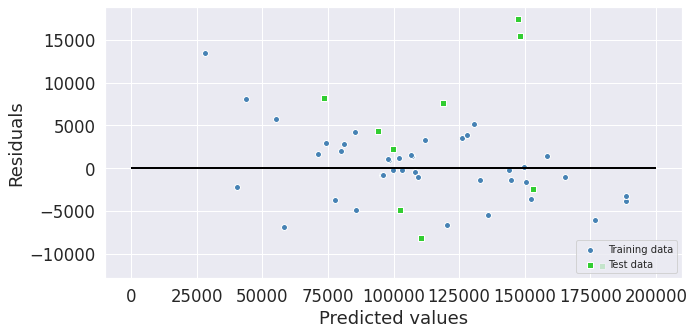

Training set RMSE range: 4135.936 +/- 228.435
Training set R^2 score range: 0.989 +/- 0.001

Test set RMSE range: 9848.859 +/- 2938.729
Test set R^2 score range: 0.941 +/- 0.026


In [134]:
# Random Forest Model Fitting

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)

regressor.fit(X_train, y_train)

y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

# Plot of Residuals and Predicted Values on Training and Test sets
plt.figure(figsize=(10,5))
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=0, xmax=200000, color='black', lw=2)
plt.tight_layout()
plt.legend(loc='lower right',prop={'size': 10})
plt.show()

# K-Fold Cross Validation, RMSE and R2 Score ranges on Training and Test sets
train_errors = []
test_errors = []

train_score = []
test_score = []

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split( X, y, 
                                  test_size=0.2, random_state=i)
    regressor.fit(X_train, y_train)
    y_train_pred = regressor.predict(X_train)
    y_test_pred = regressor.predict(X_test)
    train_errors = np.append(train_errors, mean_squared_error(y_train, 
                            y_train_pred)**0.5)
    test_errors = np.append(test_errors, mean_squared_error(y_test, 
                            y_test_pred)**0.5)
    train_score = np.append(train_score, r2_score(y_train, 
                            y_train_pred))
    test_score = np.append(test_score, r2_score(y_test, 
                            y_test_pred))
    

print('Training set RMSE range: %.3f +/- %.3f' % (np.mean(train_errors), np.std(train_errors)))
print('Training set R^2 score range: %.3f +/- %.3f' % (np.mean(train_score), np.std(train_score)))

print('\nTest set RMSE range: %.3f +/- %.3f' % (np.mean(test_errors), np.std(test_errors)))
print('Test set R^2 score range: %.3f +/- %.3f' % (np.mean(test_score), np.std(test_score)))

## Schochastic Gradient Decent Regresssion Model

In [136]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

from copy import deepcopy

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_test_poly_scaled = poly_scaler.transform(X_test)

from sklearn.linear_model import SGDRegressor
regressor = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    regressor.fit(X_train_poly_scaled, y_train)  # continues where it left off
    y_test_predict = regressor.predict(X_test_poly_scaled)
    val_error = mean_squared_error(y_test, y_test_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(regressor)

### Plotting the SGD Regression Model on Training and Test sets

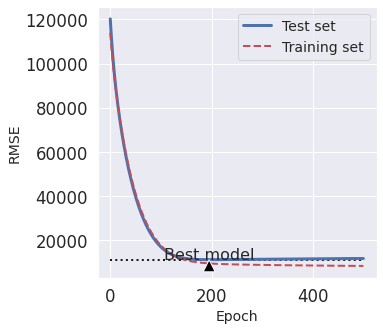

In [137]:
regressor = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

n_epochs = 500
train_errors, test_errors = [], []
train_score, test_score = [], []
for epoch in range(n_epochs):
    regressor.fit(X_train_poly_scaled, y_train)
    y_train_predict = regressor.predict(X_train_poly_scaled)
    y_test_predict = regressor.predict(X_test_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    test_errors.append(mean_squared_error(y_test, y_test_predict))
    train_score.append(r2_score(y_train, y_train_predict))
    test_score.append(r2_score(y_test, y_test_predict))

best_epoch = np.argmin(test_errors)
best_test_rmse = np.sqrt(test_errors[best_epoch])
best_test_score = test_score[best_epoch]

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  
plt.plot([0, n_epochs], [best_test_rmse, best_test_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(test_errors), "b-", linewidth=3, label="Test set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

In [138]:
print("Best Epoch:", best_epoch, "\nBest Model:", best_model, 
      "\nTest set RMSE:", round(best_test_rmse,2),
      "\nTest set R^2 Score:", round(best_test_score,2))

Best Epoch: 195 
Best Model: SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.0005, fit_intercept=True, l1_ratio=0.15,
             learning_rate='constant', loss='squared_loss', max_iter=1,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=42,
             shuffle=True, tol=-inf, validation_fraction=0.1, verbose=0,
             warm_start=True) 
Test set RMSE: 11243.76 
Test set R^2 Score: 0.89


## XGBoost Regression Model

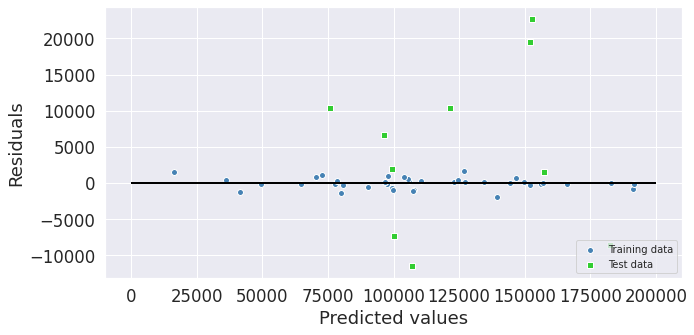

Training set RMSE range: 912.806 +/- 129.679
Training set R^2 score range: 0.999 +/- 0.000

Test set RMSE range: 11346.191 +/- 1886.677
Test set R^2 score range: 0.921 +/- 0.023


In [140]:
# XGBoost Model Fitting

import xgboost as xgb

data_dmatrix = xgb.DMatrix(data=X,label=y)

regressor = xgb.XGBRegressor(objective ='reg:squarederror')

regressor.fit(X_train, y_train)

y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

# Plot of Residuals and Predicted Values on Training and Test sets
plt.figure(figsize=(10,5))
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=0, xmax=200000, color='black', lw=2)
plt.tight_layout()
plt.legend(loc='lower right',prop={'size': 10})
plt.show()

# K-Fold Cross Validation, RMSE and R2 Score ranges on Training and Test sets
train_errors = []
test_errors = []

train_score = []
test_score = []

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split( X, y, 
                                  test_size=0.2, random_state=i)
    regressor.fit(X_train, y_train)
    y_train_pred = regressor.predict(X_train)
    y_test_pred = regressor.predict(X_test)
    train_errors = np.append(train_errors, mean_squared_error(y_train, 
                            y_train_pred)**0.5)
    test_errors = np.append(test_errors, mean_squared_error(y_test, 
                            y_test_pred)**0.5)
    train_score = np.append(train_score, r2_score(y_train, 
                            y_train_pred))
    test_score = np.append(test_score, r2_score(y_test, 
                            y_test_pred))
    

print('Training set RMSE range: %.3f +/- %.3f' % (np.mean(train_errors), np.std(train_errors)))
print('Training set R^2 score range: %.3f +/- %.3f' % (np.mean(train_score), np.std(train_score)))

print('\nTest set RMSE range: %.3f +/- %.3f' % (np.mean(test_errors), np.std(test_errors)))
print('Test set R^2 score range: %.3f +/- %.3f' % (np.mean(test_score), np.std(test_score)))

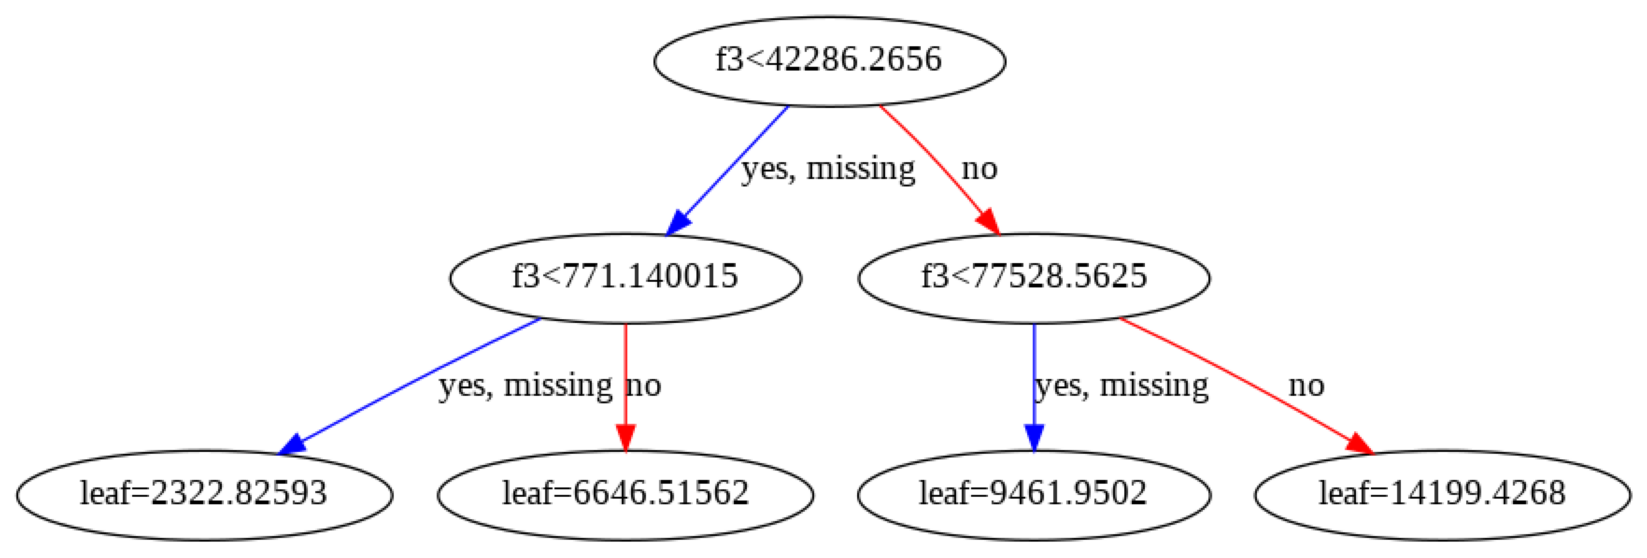

In [141]:
plt.rcParams['figure.figsize'] = [500, 10]
xgb.plot_tree(xg_reg,num_trees=0)
plt.show()

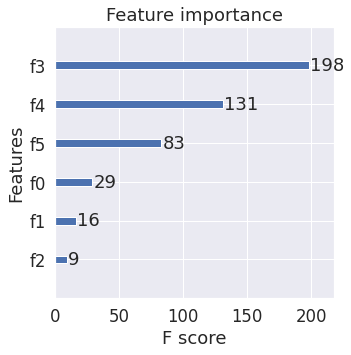

In [142]:
plt.rcParams['figure.figsize'] = [5,5]
xgb.plot_importance(xg_reg)
plt.show()

## ANN Regression Model using Tensorflow 2 and Keras

In [143]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

!pip install -U tensorboard >piplog 2>&1

In [144]:
import tensorflow as tf
import datetime
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.optimizers import Adam

In [145]:
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard

In [146]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)

In [147]:
X_train.shape

(40, 6)

In [148]:
model = Sequential()

model.add(Dense(X_train.shape[1],activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(X_train.shape[1] // 2,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(X_train.shape[1] // 3,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

model.fit(x=X_train.astype(np.float32), 
          y=y_train.astype(np.float32), 
          batch_size=100,epochs=500, 
          validation_data=(X_test.astype(np.float32), y_test.astype(np.float32)), 
          callbacks=[tensorboard_callback, early_stop])

Epoch 1/500
1/1 [==============================] - 0s 114ms/step - loss: 12278413312.0000 - val_loss: 13193598976.0000
Epoch 2/500
1/1 [==============================] - 0s 22ms/step - loss: 11905197056.0000 - val_loss: 13129854976.0000
Epoch 3/500
1/1 [==============================] - 0s 24ms/step - loss: 12067520512.0000 - val_loss: 13065971712.0000
Epoch 4/500
1/1 [==============================] - 0s 23ms/step - loss: 12158486528.0000 - val_loss: 13002942464.0000
Epoch 5/500
1/1 [==============================] - 0s 21ms/step - loss: 11318222848.0000 - val_loss: 12937553920.0000
Epoch 6/500
1/1 [==============================] - 0s 23ms/step - loss: 10885917696.0000 - val_loss: 12870539264.0000
Epoch 7/500
1/1 [==============================] - 0s 22ms/step - loss: 11996484608.0000 - val_loss: 12803577856.0000
Epoch 8/500
1/1 [==============================] - 0s 22ms/step - loss: 11953064960.0000 - val_loss: 12737129472.0000
Epoch 9/500
1/1 [==============================] - 0s 2

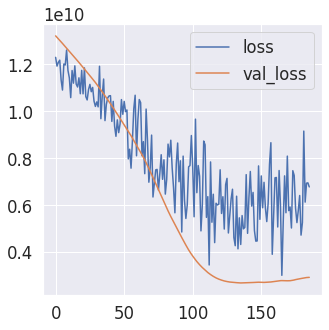

In [149]:
losses = pd.DataFrame(model.history.history)
losses.plot()

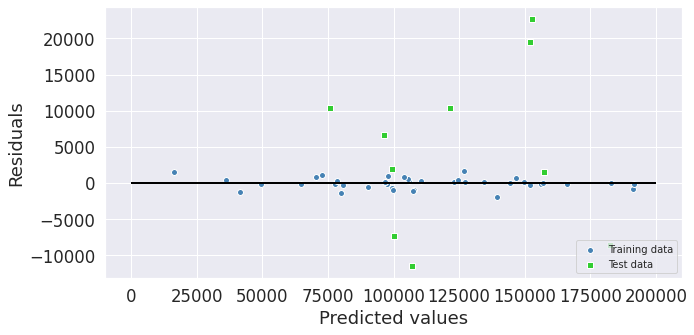

In [150]:
# Plot of Residuals and Predicted Values on Training and Test sets
plt.figure(figsize=(10,5))
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=0, xmax=200000, color='black', lw=2)
plt.tight_layout()
plt.legend(loc='lower right',prop={'size': 10})
plt.show()

In [151]:
# RMSE and R2 Score on ANN Regression Model
from sklearn.metrics import mean_squared_error
print("RMSE on training data : %.2f" % mean_squared_error(y_train, y_train_pred)**0.5)
print("RMSE on test data : %.2f" % mean_squared_error(y_test, y_test_pred)**0.5)

from sklearn.metrics import r2_score
print('\nTraining set R^2 score : %.3f' % r2_score(y_train, y_train_pred))
print('Test set R^2 score : %.3f' % r2_score(y_test, y_test_pred))

RMSE on training data : 752.65
RMSE on test data : 11912.52

Training set R^2 score : 1.000
Test set R^2 score : 0.874


In [152]:
!tensorboard dev upload --logdir ./logs

2020-08-21 16:42:13.047554: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./logs

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=373649185512-8v619h5kft38l4456nm2dj4ubeqsrvh6.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&sc

In [154]:
!tensorboard dev auth revoke

2020-08-21 16:44:33.097343: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Logged out of uploader.
